# Практическая работа №2

### Используемые библиотеки

In [215]:
from math import sqrt

import pandas as pd
from sklearn.decomposition import PCA
from numpy.linalg import eigvals

### Глобальные переменные

### Исходные данные
`data1.csv`:
```csv
a1,a2
4,2.9
2.5,1
3.5,4
2,2.1
```
`data2.csv`:
```csv
a1,a2
8,-20
0,-1
10,-19
10,-20
2,0
```

## Задание 1

In [216]:
frame = pd.read_csv('data1.csv')
print(f"Исходный набор данных:")
frame

Исходный набор данных:


,a1,a2
0,4.0,2.9
1,2.5,1.0
2,3.5,4.0
3,2.0,2.1


In [217]:
def k(x1, x2):
    return (x1["a1"] - x2["a1"])**2 + (x1["a2"] - x2["a2"])**2

print("Ядерная матрица:")
pd.DataFrame([[k(frame.loc[i], frame.loc[j]) for j in range(0, 4)] for i in range(0, 4)])

Ядерная матрица:


,0,1,2,3
0,0.00,5.86,1.46,4.64
1,5.86,0.00,10.00,1.46
2,1.46,10.00,0.00,5.86
3,4.64,1.46,5.86,0.00


## Задание 2

In [218]:
frame = pd.read_csv('data2.csv')
print(f"Исходный набор данных:")
frame

Исходный набор данных:


,a1,a2
0,8,-20
1,0,-1
2,10,-19
3,10,-20
4,2,0


In [219]:
mean = frame.mean()
print("Среднее:")
pd.DataFrame(mean)

Среднее:


,0
a1,6.0
a2,-12.0


In [220]:
covariant = frame.cov()
print("Ковариационная матрица:")
covariant

Ковариационная матрица:


,a1,a2
a1,22.0,-47.5
a2,-47.5,110.5


In [221]:
eig = eigvals(covariant.values)
print("Собственные числа для ковариационной матрицы:")
pd.DataFrame(eig, index=frame.columns)

Собственные числа для ковариационной матрицы:


,0
a1,1.332264
a2,131.167736


In [222]:
print("Матрица корреляций:")
frame.corr()

Матрица корреляций:


,a1,a2
a1,1.000000,-0.963388
a2,-0.963388,1.000000


## Задание 3

In [223]:
pca = PCA(n_components=2)
pca.fit_transform(frame)

print("Первые две главные компоненты:")
pd.DataFrame(pca.components_, columns=frame.columns)

Первые две главные компоненты:


,0,1
a1,-0.398979,0.916960
a2,-0.916960,-0.398979


In [224]:
print("Остаточная дисперсия компонент:")
pd.DataFrame([eig[0] / sum(eig), eig[1] / sum(eig)])

Остаточная дисперсия компонент:


,0
0,0.010055
1,0.989945


График векторов главных компонент:


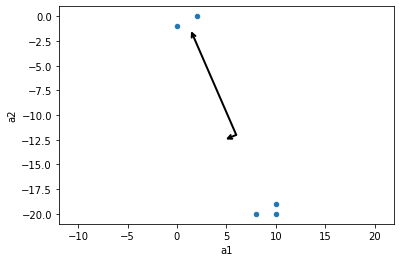

In [236]:
plot = frame.plot.scatter("a1", "a2")
plot.axis("equal")
print("График векторов главных компонент:")

for length, vector in zip(pca.explained_variance_, pca.components_):
    props = {"arrowstyle": "->", "linewidth": 2, "shrinkA": 0, "shrinkB": 0}
    plot.annotate("", mean + vector * sqrt(length), mean, arrowprops=props)

#### Медиана
##### Медиана - это число, которое находится в середине набора, если его упорядочить по возрастанию.
##### Формула:
\begin{equation}
    med(x) =
    \begin{cases}
        X_{\frac{n}{2}} & \text{если $n$ чётное} \\
        \frac{X_{\frac{n-1}{2}} - X_{\frac{n+1}{2}}}{2} & \text{если $n$ нечётное}
    \end{cases}
\end{equation}
,где $X$ - отсортированный набор значений, $n$ - количество значений в наборе.
